# Session 7: 
# data visualization and plotting

In [3]:
%matplotlib inline
#please ignore this -- it's a "special" command 
#that we only need to enable plotting within the notebook

Virtually any time we are dealing with numerical data, we will want to make some sort of plot. In fact, usually we'll end up making lots of plots on the way towards solving a particular problem.

In this session, we'll see how *Python* -- and specifically *matplotlib* within *Python* -- makes it really easy to create plots that are useful enough to drive your research, clear enough for inclusion in professional journal articles and pretty enough to hang on your wall as a poster.

In order to make things a bit more interesting, **all of the examples we will use in this session to illustrate things will make use of *real* data.**

Data comes in lots of different forms. However, in the context of data visualization, we can usefully classify data by their dimensionality:

* 1-dimensional data (x)      : one column -- a single number per row
    * e.g. height measurements for 100 people
<br>
<br>
* 2-dimensional data (x, y)   : two columns -- pairs of numbers
    * e.g. height and weight measurements for 100 people
<br>
<br>
* 3-dimensional data (x, y, z): three columns -- triplets of numbers
    * e.g. height, weight and age measurements for 100 people
    * e.g. brightness/density on a 2-d grid
<br>
<br>
* n-dimensional data (x_i)    : n columns -- n-tuples of numbers
    * e.g. height, weight, age and weekly alcohol consumption for 100 people
<br>

This classification is useful because we tend to make different kinds of plots for data with different dimensionality.

We have lumped together data with n > 3 dimensions here, because displaying the full dimensionality of such data sets in a single plot is somewhere between difficult and impossible (depending on n).

Typically, when we deal with such data, we will effectively plot their *projections* onto lower dimensional spaces. However, the vast majority of data sets we tend to encounter have n = 1, 2 or 3, so this is what we will focus on.

Let's go through these different types of data one at a time and see how we can use *Python* to generate plots that help us visualize and understand what's going on. We'll start with 2-dimensional data since it is the most common and also actually the easiest to deal with.

As discussed in Session 4, we can do virtually everything we'll ever want to do with the functions provided by the *pyplot* module within *matplotlib*. 

## 2-dimensional data

Two-dimensional data is composed ot pairs of (x, y) values. In just about every case, the first thing we want to do when we are given such data is to make a scatter plot. Luckily, *pyplot* makes this really easy for us.

The file package for this session on the Blackboard site for the course includes several data files we will use as examples. The one we will need for experimenting with 2-dimensional data is called "hubble.dat". This contains observational data on almost 200 galaxies, specifically their "redshift" (see below) and their distance from us, along with errors on those distances.The distances of each galaxy in the file are given in units of Gigalightyears, i.e. billions of light years.

Because we live in an expanding universe, all galaxies we observed appear to be moving away from us (you can think about the galaxies as raisins in an expanding loaf of bread in the oven). Moreover, since there is more expanding space between us and the more distant galaxies, those galaxies appear to be moving away fastest.

The redshift -- usually denoted "z" -- of a galaxy is basically just the velocity at which it is observed to move away from us, measured in units of light speed. (Note that since recession speeds greater than the speed of light are actually allowed here, since it is the space between galaxies that's expanding, rather than galaxies moving on a fixed background.)

OK, let's read that data in and plot it.

### A simple scatter plot

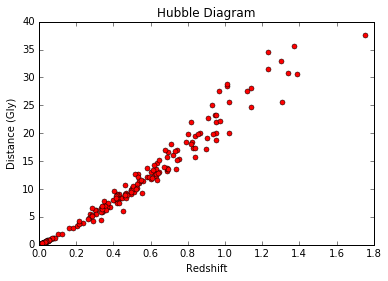

In [5]:
import numpy as np
from matplotlib import pyplot as plt

z, d, de = np.loadtxt('hubble.dat',\
                  unpack=True, \
                  dtype=float, \
                  comments="#")


plt.xlabel('Redshift')
plt.ylabel('Distance (Gly)')
plt.title('Hubble Diagram')
plt.plot(z, d, color='red', marker='o', markersize=5, linestyle="None")
plt.show()

Note how quick, easy and intuitive it is to make a simple, but nice-looking plot like this!

A few things to note are:

* *plot()* is the function that does the heavy lifting
<br><br>
* *show()* actually produces the plot that we've created
<br><br>
* we can plot multiple data sets in a single window 
    * multiple *plot()* commands followed by a single *show()*
<br><br>
* *pyplot* chose suitable axes dimensions and tickmarks for us
    * we'll see how to customize these later
<br><br>
* the only required input parameters for *plot()* are the data
    * if we don't specify color etc, defaults will be used
<br><br>
* *linestyle="None"* means we do not want to connect the points by lines
<br><br>
* the *markersize* property is measured in "points"
    * useful values are typically all between 1 and 10

The *plot()* command is actually amazingly flexible, offering lots of additional ways to customize and pretty up your plots. A reallyl useful tutorial is provided here: 

http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html

The official documentation for *pyplot* as a whole is here:

http://matplotlib.org/api/pyplot_summary.html

And the official documentation for *plot()* is here:

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot


##### Exercise

Write a function that implements a simple mathematical function (quadratic, exponential, whatever). 

Create a *numpy* array of x-values and call your function (so that it returns the y-values).

Now plot the data. Play with the parameters of the *plot()* command to get a feel for how to make things look nice.

*Advanced*: try adding some "experimental error" to your data -- use one of the the random number generating functions in *numpy* to create the errors and add them to your y-values. Plot it again.

I'll note here for reference that there is also a dedicated function within *pyplot* for scatter plots. It's called, appropriately enough *scatter()*. 

The basic syntax for calling *scatter()* is very similar to that for *plot()*. Perhaps the main difference is that *scatter()* allows us to use "colormaps". This means every (x, y) point gets its own colour, typically chosen according to some additional variable. 

Perhaps you can already see how this would be useful for plotting 3-dimensional data...

##### Exercise

Plot the Hubble diagram data using *scatter()*. Can you figure out how to modify the color map that is being used? 

Anyway, by for the most common things we'll want to mess with to make our plots look nicer are the type of markers we use to plot points, the linestyle we use to show continuous curves, and the colors we use for these things.

Here is a visual summary of the choices that are available for those properties and what they look like.

<img src="marker_reference_00.hires.png">

<img src="marker_reference_01.hires.png">

<img src="line_styles_reference.hires.png">

<img src="named_colors.hires.png">

### Adding a line or a curve

Let's add a simple "model" curve to our plot. Based on visual inspection, we might guess a straight line with slope 20 Gly per unit  redshift could lie close to the data. Let's find out:

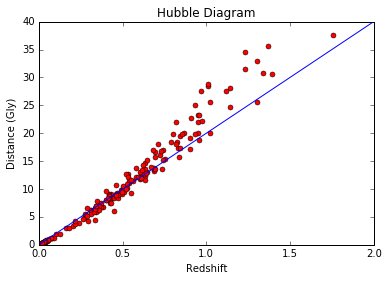

In [6]:
plt.xlabel('Redshift')
plt.ylabel('Distance (Gly)')
plt.title('Hubble Diagram')
plt.plot(z, d, color='red', \
         marker='o', \
         markersize=5, \
         linestyle="None")

#create a 1-dimensional array representing
#the x-values for our linear model
x = np.linspace(start=0, stop=2, num=100) 

#create the model
y = 20.0*x

plt.plot(x, y, color='blue', \
         marker='', \
         linestyle="-")
plt.show()

Note that we used the *linspace* command from *numpy* here to create a regularly spaced 1-D *array*.

##### Exercise:

Estimate the average slope of all the points between redshift 0 and 0.5 in the Hubble diagram. Since we'll assume that the data should go through the origin, you can get an independent estimate from every single (x, y) pair. 

Replot the Hubble diagram over the range 0 to 0.5 only (see the relevant *plot()* parameters). Now overplot both the "by-eye" model from above (the blue line in the last diagram) and also the line corresponding to your average slope. Which fits the data better?

The slope you have just measured is the famous *Hubble constant*, $H_0$, which measures the rate of expansion of the universe. $H_0$ is usually given in units of "km/s per Mpc", where Mpc stands for Megaparsec, which is equivalent to $3.26 \times 10^6$ light years. The best current estimate of the Hubble constant is approximately $H_0 = 68 \pm 1$ km/s per Mpc. How does this compare to your estimate?

### Logarithmic axis

One of the most useful things you can do when inspecting an unfamiliar data set is to plot it with one or both of the axis shown with logarithmic scaling.

If you have not yet encountered logarithmic plots, here is a quick introduction. Basically, all we're doing is taking the logarithm of our relevant quantity (usually the normal base-10 log) and plotting that instead of the quantity itself.

Let's see how this looks for our Hubble diagram, for example:

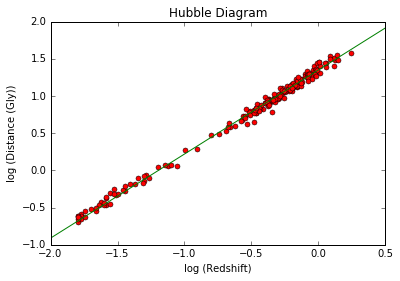

In [7]:
ld = np.log10(d)
lz = np.log10(z)
#
plt.xlabel('log (Redshift)')
plt.ylabel('log (Distance (Gly))')
plt.title('Hubble Diagram')
#
plt.plot(lz, ld, color='red', \
         marker='o', \
         markersize=5, \
         linestyle="None")



## Now plot a new model, linear in log-log space (see below)
## Parameters determined by trial and error

lx = np.linspace(start=-2, \
                 stop=0.5, \
                 num=100)

ly = 1.35 + 1.13*lx       

plt.plot(lx, ly, \
         color='green', \
         marker='', \
         linestyle="-")

plt.show()

Perhaps you can already see from this why logarithmic plots are useful. This figure just looks "cleaner" than the original (linear) one. We'll explain that in a second.

For the moment, wouldn't it be nice though if we could make logarithmic plots like this, but with the axis label still in linear units? After all, it's the linear data that is in physical units, and our intuition works much better in linear units.

(If you don't believe me: quick, how many billion of light years away is a galaxy located at y = 0.356 in the plot above?)

This is exactly what we mean by saying we'll plot something on a logarithmic axis. The tickmarks on those axes won't be linearly spaced anymore, of course, but that's not really a problem.

There are different ways of making logarithmic plots with *pyplot*. The simplest is via the *semilogx()*, *semilogy()* and *loglog()* functions. These work basically just like *plot()*, except that one or both axes are shown logarithmically.

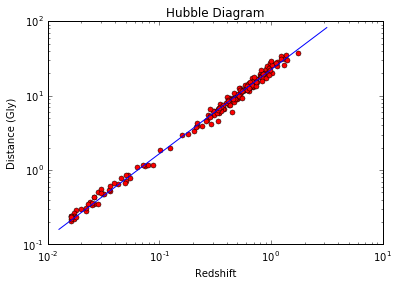

In [8]:
from matplotlib import pyplot as plt

plt.xlabel('Redshift')
plt.ylabel('Distance (Gly)')
plt.title('Hubble Diagram')

plt.loglog(z, d, color='red', marker='o', markersize=5, linestyle="None")


#let's overplot a power law --> straight line
#parameters here were found by trial and error
x = np.logspace(start=-1.9, \
                 stop=0.5, \
                 num=100)       #like linspace, but creates
                                #logarithmically spaced data
                                #start and end are logs
                                #resulting x-values are not.

y = 22.4*(x**1.13)
plt.loglog(x, y, color='blue', marker='', linestyle="-")
plt.show()

#### The uses of logarithmic plots

Why would we want to experiment with plotting things logarithmically? Two basic reasons:

###### 1. Dynamic range

If our data spans a large dynamic range (i.e. if the max value divided by the min value is greater than 10 or 100, say), a linear plot compresses all the small values into a tiny part of the axis.

By using a logarithmic axis we remove this compression.

We can actually see this quite well in our Hubble data. If we look back at our original linear plot, it seems as if there is not very much data available at redshifts z < 0.2 or so. Yet when we look at the logarithmic plot above, it's clear that, actually, there is lots of data in this low-redshift region. The reason we couldn't see it in the linear plot was just that all that low-redshift data overlapped, since it was all compressed into a tiny region near the origin.

Our logarithmic plot also immediately reveals that our data set contains two distinct "clumps". There is a low-redshift clump containing objects at z < 0.1 or so, and then there is a high-redshift clump containing objects with z > 0.2 or so. This is useful and important information, but it only showed up when we plotted the data logarithmically.

(In case you're wondering: the reason for the clumping is that this data is a compilation of observations obtained via different methods. One of these is great at getting low-redshift data, the other at getting high-redshift data.)

###### 2. Power laws and exponentials

By far the two most common functional forms we encounter in physics and astronomy are *power laws* and *exponentials*. An amazing number of theoretical predictions and empirical measurements turn out to have these forms, at least approximately.

When we are analysing a new 2-D data set, one of the first things we might want to check is whether it has one of these forms. Log-log and semi-log plots make this trivial:

* Power laws: $y = a\,x^n$
    * take log of both sides: <br>
        * $log(y) = log(a) + n \,\, log(x)$<br>
    * so the log-log plot is a straight-line<br>
    * the slope is the power-law exponent $n$
<br>
<br>
* Exponentials: $y = e^{nx}$
    * take logarithms of both sides:<br>
        * $ln(y) = nx \,\, ln(e) = nx$<br>
        * $log_{10}(y) = nx \, log_{10}(e) = 0.434\;nx$<br>
    * so the semi-log plot is a straight line<br>
    * the slope is (proportional to) $n$

Our Hubble plot is actually a really nice illustration of this also. Let's take yet another look at both the linear-space and the log-space plots. If we look carefully, we'll see that the data seems to lie on a much straighter line in the log-log plot than in the linear plot. This suggests that the data is, in fact, not linear, but close to a power law. This is actually true (the power-law exponent is slightly bigger than unity).

##### Exercise

Work out the *average* slope and intercept for the log-log plot. (Think about what "average" actually means in this context...). Make a new log-log plot that shows the data together with the line based on the average parameters.

### Error bars

Another improvement to our plot would be to show the error bars on the distances.

In fact, given that our course is on statistics and data analysis, we can expect to have to do that an awful lot.

Luckily, *pyplot* makes this really easy, via the *errorbar()* (instead of the *plot()* command:

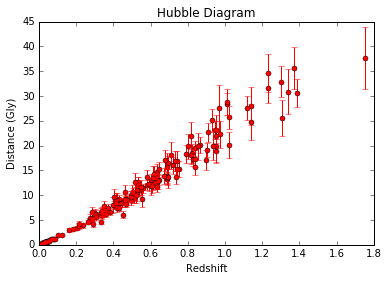

In [9]:
plt.xlabel('Redshift')
plt.ylabel('Distance (Gly)')
plt.title('Hubble Diagram')
plt.plot(z, d, color='red', marker='o', markersize=5, linestyle="None")
plt.errorbar(z, d, yerr=de, color="red", linestyle="None")
plt.show()

What about error bars on our log-log plot?

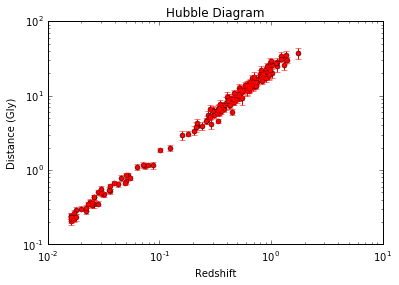

In [10]:
plt.xlabel('Redshift')
plt.ylabel('Distance (Gly)')
plt.title('Hubble Diagram')

plt.loglog(z, d, color='red', marker='o', markersize=5, linestyle="None")
plt.errorbar(z, d, yerr=de, color="red", linestyle="None")

plt.show()

Let's take a moment to think about how miraculous this last code snippet is!

The *errorbar()* call is *exactly* the same as it was for the linear plot! At no point did we have to transform our linear errors into logarithmic errors. *matplotlib* did that for us!

But how the hell could it actually do this? After all, the actual command we were using -- *errorbar()* -- made no reference to the fact that we were wanting to plot a log-log plot!

The answer is related to the reason we always need to say *plt.show()* to actually plot anything. What *matplotlib* actually does when it encounters the first plotting command -- like *xlabel()*, *ylabel()* or *plot()* -- is to create a *figure* object.

*Figure* is a data type provided by *matplotlib*. When a new *figure* object is created, *matplotlib* knows that a new figure is being started now, so all subsequent plotting commands refer to that same figure. This only stops when we display the figure (using *show()*) and then close it (by closing the window or using the *close()* function). 

So the reason *errorbar()* knew that **this time** we wanted logarithmic error bars was that *matplotlib* had been keeping track of the properties of the current *figure*. And by using the *loglog()* command earlier, we'd already specified that this time our axes were logarithmic. Nifty, no?

## 1-dimensional data

What if our data consists of just a single set of values? 

We should still inspect this visually, in order to see whether and what sort of patterns there might be.

How do we plot 1-D data? Simple: we make histograms!

As an example, let's load the 1-D data set I've provided called "pulsar_spins.dat". This contains the spin periods of accreting neutron stars a set of X-ray pulsar binary systems, measured in seconds.

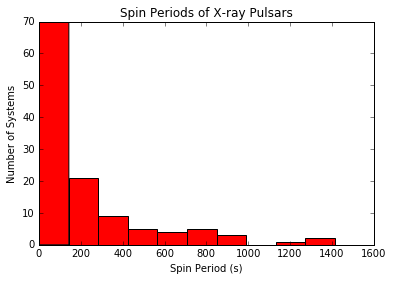

In [11]:
import numpy as np
from matplotlib import pyplot as plt

p = np.loadtxt('pulsar_spins.dat',\
                unpack=True, \
                dtype=float, \
                comments="#")

plt.title('Spin Periods of X-ray Pulsars')
plt.xlabel('Spin Period (s)')
plt.ylabel('Number of Systems')
plt.hist(p, bins=10, color="red")
plt.show()

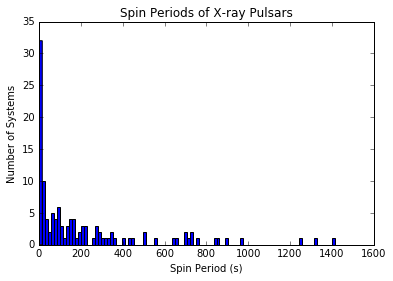

In [12]:
plt.title('Spin Periods of X-ray Pulsars')
plt.xlabel('Spin Period (s)')
plt.ylabel('Number of Systems')
plt.hist(p, bins=100, color="blue")
plt.show()

Two things ought to jump out at us immediately:

1. the appearance of a histogram can depend quite strongly on the adopted binning;

2. our data set has a very large dynamic range.

The second point should immediately suggest to use that perhaps we should display this data with a logarithmic x-axis.

Unfortunately, *pyplot* does not provide a convenient equivalent to *loglog()* for 1-D plots with logarithmic x-axes. For the moment, we'll therefore simply transform the data points to their logarithms ourselves and use *hist()* on the logarithms. This is fine, except that it won't automatically make a nice linear axis for us.

(Logarithmic y-axes are easy by comparison. There is an optional *Boolean* parameter for *hist()* called "log". If this is set to *True*, the y-axis is shown logarithmically.)

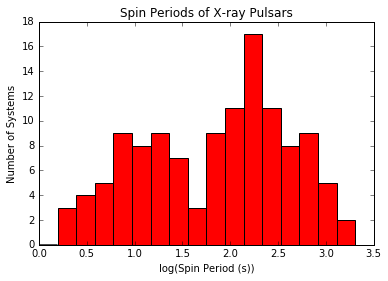

In [13]:
lp = np.log10(p)

plt.title('Spin Periods of X-ray Pulsars')
plt.xlabel('log(Spin Period (s))')
plt.ylabel('Number of Systems')
plt.hist(lp, range=(0, 3.5), bins=18, color="red")
plt.show()


We see that, indeed, the logarithmic plot is much more appropriate and illuminating in this case. In fact, I hope you might believe that it suggests that the spin period distribution is *bimodal*, i.e. that it has two distinct peaks.

I say that because this data set was put together by our own Prof Malcolm Coe, and our analysis suggesting this bimodality was actually published in *Nature* -- check out:

http://www.nature.com/nature/journal/v479/n7373/full/nature10529.html

Who says statistics is boring?

##### Exercise

Play around with different binning schemes when plotting this data. Both the range and the number of bins matter to the appearance of the plot. Hopefully you'll agree that the evidence for bimodality is pretty robust, but you'll probably also see just how scarily different the same data can look when histogrammed differently!

At this point you might wonder if there is a "correct" or "optimal" way to decide on the binning scheme for a given data set. The answer is somewhere between "sort of" and "not really".

There *are* some quantitative methods people have suggested for setting the number of bins to be used. However, there isn't really one widely accepted answer to this question.

For our purposes, the main thing is to understand that binning matters and to develop some intuition: when is the adopted binning too fine and when is it too coarse?

The importance of the adopted binning scheme:

* if the chosen bin sizes are too coarse:
    * the histogram is too smooth to see real structure in the data
<br>
<br>

* if the chosen bin sizes are too fine:
    * the histogram is too jagged to see real structure in the data
    
It is usually a good idea to iterate towards a sensible binning scheme by trial and error. 

This also provides information on the sensitivity of the histogram to the ultimately adopted binning scheme.

## 3-dimensional data

What if our data is 3-dimensional?

In this case, we probably want to plot one of two things:

**Images**
* plot z-values as colours or brightness on a 2-D (x,y) grid;
    <br><br>
    
**Contour plots** 
* show lines of constant z-values on the 2-D (x,y) grid.

### Creating 3-D data

Before we jump into plotting 3-D data, let's start by looking at how we can *create*  it within *Python*.

We will store our data as *numpy* *arrays*, and the first step is to create a nice, regular 2-D (x,y) grid for this purpose. We do this in *numpy* with the *meshgrid()* command.

In [14]:
nx = 3                       #define number of grid points in x
ny = 2                       #define number of grid points in y
#
x = np.linspace(0, 1, nx)    #set up a 1-D array holding the x values 
y = np.linspace(0, 1, ny)    #set up a 1-D array holding the y values
#
xv, yv = np.meshgrid(x, y)      #call meshgrid to create two "matching"
                             #2-D arrays, so that each pair of 
                             #       (xv[i,j], yv[i,j])
                             #corresponds to a grid point.

print type(xv)
print xv
#
print
#
print type(yv)
print yv

<type 'numpy.ndarray'>
[[ 0.   0.5  1. ]
 [ 0.   0.5  1. ]]

<type 'numpy.ndarray'>
[[ 0.  0.  0.]
 [ 1.  1.  1.]]


### Contour plots

It's probably easiest to understand both *meshgrid()* and contour plots  if we see things in action. 

Let's use *meshgrid()* to set up a function z = f(x,y) and create a contour plot for it.

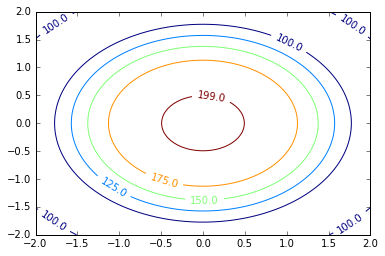

In [15]:
nx = 100                       #define number of grid points in x
ny = 100                       #define number of grid points in y


x = np.linspace(-2, 2,num=nx)     #set up a 1-D array holding the x values 
y = np.linspace(-2, 2,num=ny)     #set up a 1-D array holding the y values

#call  meshgrid to create the "matching" 2-D arrays
xv, yv = np.meshgrid(x, y) 

#define the function z = f(x, y)
z = 100.0 * (1 + np.sin(xv**2.0 + yv**2.0) / (xv**2.0 + yv**2.0))

#define the z-levels we want to place contours at
levs = [100, 125, 150, 175, 199]

#plot the contours:
#we could either do:
#cs = plt.contour(x, y, z, 5)    #plot 5 automatically chosen contours
#or we can do:
cs = plt.contour(x, y, z, levels=levs) #plot contours at given levels

#label the contours
plt.clabel(cs, inline=1,fmt='%5.1f') 

#show off our work
plt.show()

There is lots of additional control we can exert over these contour plots. For details, see:

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contour

##### Exercise

You guessed it: mess around with your contour plot to get a feel for how the command works and how such plots look. 

##### Exercise

Define your own function z = f(x, y) and plot plot contours for it. Don't make it *too* boring!


### 2-D histograms

Sometimes, our data isn't "intrinsically" 3-dimensional, but instead is something like a huge number of 2-dimensional (x, y) values. 

With such data sets, we would often like to create a 2-D version of our 1-D histogram.

In order to do this, we have to "bin" the data in the same way as for the 1-D histogram. So we have to grid up the x-y plane and count the number of data points in each grid square.

In this case, of course, the binned-up data is 3-dimensional (x, y, height). 

How do we plot this?

Let's read in some sample data for this. On the Blackboard site, I've provided a file called "galaxies.dat" This contains a data set providing estimated masses and star formation rates for over 750,000 galaxies.

The data in the file are given in logarithmic units, specifically they are log(mass), with mass in in solar masses, and log(star formation rate), with star formation rate in solar masses per year.

Let's grab it.

In [17]:
import numpy as np
from matplotlib import pyplot as plt

lm, lsfr = np.loadtxt('galaxies.dat',\
                  unpack=True, \
                  dtype=float, \
                  comments="#")


m = 10.0**lm
sfr = 10.0**lsfr

The most obvious and straightforward thing to do is to assign different colours to different heights.

As it happens, *pyplot* provides convenient functionality for this:

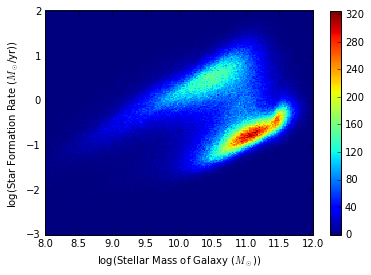

In [18]:
#define plotting ranges (optional)
xmin = 8
xmax = 12
ymin = -3
ymax = 2
rnge = [[xmin, xmax], [ymin, ymax]]

#plot 2-D histogram
plt.hist2d(lm, lsfr, range=rnge, bins=200)

#add a colour-bar
plt.colorbar()

#add labels 
plt.xlabel('log(Stellar Mass of Galaxy ($M_\odot$))')
plt.ylabel('log(Star Formation Rate ($M_\odot$/yr))')
#don't worry about the $M_\odot$ -- this is just 
#a convenient trick to plot a nice "solar mass" symbol

plt.show()

How cool is that? We've just discovered that galaxies come in two distinct types! One type has high star formation rate at given mass, the other low. It turns out that these two types  correspond to spiral galaxies (like our Milky Way) and elliptical galaxies, respectively.

##### Exercise

Take the galaxies data and plot 1-D histograms of it, i.e. create histograms in galaxy mass only and in star formation rate only. (These are then effectively projections of the data onto those axes.) Make sure you are using appropriate binning.

What information is retained in these 1-D histograms, and what information is lost (compared to the 2-D histogram)?

##### Exercise

See if you can figure out how to plot the galaxies 2-D histogram and the two 1-D histograms (i.e. the projections onto the galaxy mass and star formation rate axes) *on the same plot*. 

What you want here is to have several panels in the same plot, ideally arranged like this:

<img src="myplot1.jpg"> 

Don't worry about adding contours to the plot, and note that the exact arrangement (e.g. having the panel on the right rotated) is an optional (and perhaps quite advanced) bonus.

Start by familiarizing yourself with *subplot()*, which is the simplest way of putting multiple panels onto the same figure. Then take a look at *subplot2grid()*, which gives you more control about the shapes of the various panels etc.

##### Exercise

Plot the galaxies data as a scatterplot. Is there a way to make this look nice and informative?

##### Exercise

On the Blackboard site, I've provided another interesting large data set is worth exploring. The file is called height-weight.dat and list the height (in inches) and weight (in pounds) of 25,000 adolescents up to the age of 18. This data was taken from 

http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights

Visualize the data, particularly using a 2-D histogram. Try out different colormaps (see *set_cmap()* in *pyplot*). Does the data make sense to you?

Look at the various commands that are available to you in *pyplot* 

http://matplotlib.org/api/pyplot_summary.html

Can you make your current plot(s) different/better/more interesting? Can you make new/different plots that are valuable?

### (Slightly) advanced topics

OK, but even though we have quite a lot of control over our plots with vanilla-flavoured *pyplot* commands, we don't have *total* control. 

What if we don't want *Python* to guess at the best way to plot things for us? What if we want to control some arcane aspect of the way the figure is rendered, for example? Maybe we want to put a nice border round it.  

Or what if we want to do something special with the axes? Perhaps we want to plot the numbers in a particular way or put tickmarks in non-standard locations.

It's actually not too hard to get full control of just about everything in our plots. In order to do so, we have to remember what we talked about above, when we discussed the miraculously correct rendering of logarithmic error bars.

We noted there that the reason this worked was that *Python* essentially opens a *figure* object when we start plotting. 

Well, that *figure* object is a real thing -- *figure* is a data type (a *class* in *Python* lingo). As such, it has attributes like methods and parameters. And it is those that control some of the things we are talking about.

Similarly, each plot comes with an *axis* object. Again, this is a real thing -- i.e. there is a data type *axis* with methods and parameters. We can access these to modify lots of things in our plots.

The only problem we have now is that these objects may exist "in the background", but since we don't have any variables assigned to them, we can't actually access their methods or parameters.

Luckily (as usual) *pyplot* provides an easy solution for us. There are *pyplot* functions that return the current *figure* and *axis*. We can then assign that to a variable and change its attributes.

You might very well be horribly confused by now! What the hell does it mean for a function to return a figure or an axis? 

But, actually, this isn't really so crazy. For example, *figure* is just the name of a data type that (mainly) stores whatever numbers *Python* needs in order to render a figure for us (the size and location of the canvas, whether the should be a border, etc). 

So "returning a figure" essentially just means "returning those numbers". Now those numbers may be in a format that make no sense to use whatsoever -- so there is little point trying to "print" a *figure*, for example. But that doesn't matter as long as they make sense to *Python*.

So, effectively, when we assign a variable name to a *figure*, we're creating a way for us to change some of the numbers that define that figure.

The *pyplot* functions that return the current *figure* and *axis* are called *gcf()* and *gca()*, for "get current figure" and "get current axis", respectively.

So we can write things like

myfig = plt.gc()

after which the variable "myfig" is the name of the current figure, and we can change various attributes via the usual "dot" notation.

Let's see how this works. As a first example, we'll change the height and width of one of our figures and put ticks in some weird places of the x-axis of the plot.

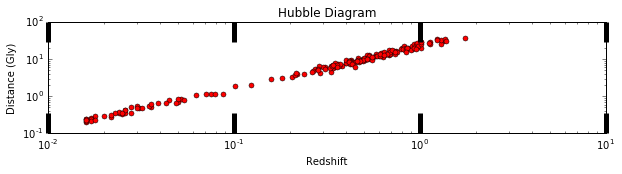

In [20]:
from matplotlib import pyplot as plt
from matplotlib import ticker as tick

import numpy as np
from matplotlib import pyplot as plt

z, d, de = np.loadtxt('hubble.dat',\
                  unpack=True, \
                  dtype=float, \
                  comments="#")


plt.xlabel('Redshift')
plt.ylabel('Distance (Gly)')
plt.title('Hubble Diagram')

plt.loglog(z, d, color='red', \
           marker='o', \
           markersize=5, \
           linestyle="None")

#now assign the variable name ax to the current axis
ax = plt.gca()  
#
#modify the appearance of the ticks on the x-axis
ax.xaxis.set_tick_params(length=20, width=5)
#
#
#now assigne the varigable name fig to the current figure
fig = plt.gcf()
#
#change height and width of the figure; specified in inches
fig.set_figheight(2)
fig.set_figwidth(10)

plt.show()

As a second and final example, let's try to fix the one thing that we might not like about the original log-log plot: the big ticks are labelled in scientific notation. This is often a very sensible idea for logarithmic plots (especially if they cover large dynamic ranges). However, in some cases -- like here -- we might prefer to show the numbers as *floats*, for example.

We can modify this quite easily by messing with the *axis* of the figure. The only slight complication is that we can't just pass it a normal print formatting string. Instead, we have to convert one of those normal strings into the format that the *axis* attribute can understand.

We can do this via another module from *matplotlib*, called *ticker*. This includes a function that takes a normal *print* formatting string and returns an object that the *axes* object understands. The *axes* object in turn has loads of built-in methods and parameters, including one that takes that formatting object and applies it to the current *axes*.

Here goes:

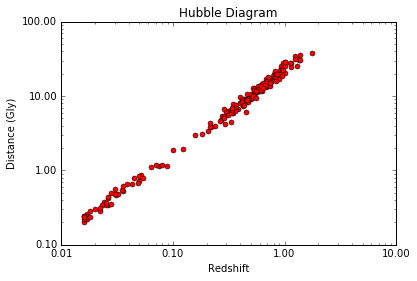

In [21]:
from matplotlib import pyplot as plt
from matplotlib import ticker as tick

import numpy as np
from matplotlib import pyplot as plt

z, d, de = np.loadtxt('hubble.dat',\
                  unpack=True, \
                  dtype=float, \
                  comments="#")


plt.xlabel('Redshift')
plt.ylabel('Distance (Gly)')
plt.title('Hubble Diagram')

plt.loglog(z, d, color='red', \
           marker='o', \
           markersize=5, \
           linestyle="None")

#assign the name ax to the current axis
ax = plt.gca()

#use the function FormatStrFormatter within ticker
#to convert our normal print format string to something
#the axis will understand
tickform = tick.FormatStrFormatter('%3.2f') 

#now use the built-in set_major_formatter method in axis
#to apply that new formatting
ax.xaxis.set_major_formatter(tickform)
ax.yaxis.set_major_formatter(tickform)

plt.show()

Let me finish with a couple of crucial points:

1. The advanced stuff we did at the end isn't really crucial in order to make nice plots with *Python*. So if you found all this incomprehensible, don't worry too much about it. Focus on getting to grips with basic plots and make sure you know how to make those.

2. Do **not** worry about somehow memorizing the ridiculously large number of built-in function, methods and attribute names. Seriously: "set_major_formatter" ???  The point here is to be aware that you can change just about everything about a *matplotlib* figure, and that the basic idea is generally to mess with attributes of the *figure* or *axis*. When you actually encounter something you want to do, you'll be able to look up the appropriate method or whatever pretty quicky.

### xkcd-ify your plots
 
I almost forgot the most important thing! There is an easy way to make every single one of your plots like 230% better -- xkcd-ify it!

If you don't know what I'm talking about, take a look at https://xkcd.com/ -- you're in for a treat. Here is a nice example of one of xkcd's beautiful (and made-up) plots:

<img src="automation.png">

Well, now you, too, can make plots that look every bit as nice! I know, I know -- it seems too good to be true. 

But it gets even better -- it turns out that *xkcd()* is defined as a function in *pyplot*, so you can xkcd-ify every plot just by adding the call *plt.xkcd()*.

Let's make an xkcd-style Hubble diagram!

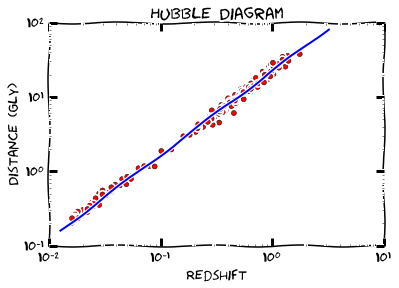

In [22]:
from matplotlib import pyplot as plt
import numpy as np

plt.xkcd()

z, d, de = np.loadtxt('hubble.dat',\
                  unpack=True, \
                  dtype=float, \
                  comments="#")

plt.xlabel('Redshift')
plt.ylabel('Distance (Gly)')
plt.title('Hubble Diagram')


plt.loglog(z, d, color='red', marker='o', markersize=5, linestyle="None")


#let's overplot a power law --> straight line
#parameters here were found by trial and error
x = np.logspace(start=-1.9, \
                 stop=0.5, \
                 num=100)       #like linspace, but creates
                                #logarithmically spaced data
                                #start and end are logs
                                #resulting x-values are not.

y = 22.4*(x**1.13)
plt.loglog(x, y, color='blue', marker='', linestyle="-")
plt.show()

Note: if you get an error message about the font ("Humor Sans") not being found and find that the fonts in your figure don't have that nice hand-drawn look to them, you'll need to install the correct font on your system. Most likely, what you need to do is:

1. Get the font and install it on your system. The ttf file containing the font is available <a href="http://antiyawn.com/uploads/humorsans.html">here</a>. You should be able to install it on most operating systems just by double-clicking on it.
<br><br>
2. Clear your matplotlib font cache(s), which means deleting (or, if you want to be 110% safe, renaming) the cache file. There are two likely places for this: <br> C:\Users\yourUsername\.matplotlib\fontList.cache<br>
C:\Users\yourUsername\.cache\matplotlib\fontList.cache<br><br>
If you're a linux user (and I think this also works for Macs, probably), the corresponding files are:<br>
/home/yourUsername/.cache/matplotlib/fontList.cache<br>
/home/yourUsername/.matplotlib/fontList.cache

##### Exercise

Take a data set you've obtained from a recent experiment in your pratical lab course. Use all of the methods and tricks you've learned to visualize and plot this data. Is there structure you haven't noticed before? Is it linear? Logarithmic? Exponential? Can you overplot a simple model curve on top? 